In [ ]:
# https://www.yelp.com/dataset/documentation/main

In [ ]:
import pandas as pd
import json
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [1]:
# review extraction 

line_count = len(open("data/review.json", encoding="utf8").readlines())
user_ids, business_ids, stars, dates, props = [], [], [], [], []
with open("data/review.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        props += [blob["useful"]] + [blob["funny"]] + [blob["cool"]]
        
ratings = pd.DataFrame({"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates, "props": props})
user_counts = ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()

100%|████████████████████████████████████████████████████████████████████| 6685900/6685900 [00:48<00:00, 138108.18it/s]


In [10]:
# business extraction

line_count = len(open("data/business.json", encoding="utf8").readlines())
business_ids, state, stars, review_count, is_open, attributes, categories = [], [], [], [], [], [], []
with open("data/business.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        state += [blob["state"]]
        stars += [blob["stars"]]
        review_count += [blob["review_count"]]
        is_open += [blob["is_open"]]
        attributes += [blob["attributes"]]
        categories += [blob["categories"]]
        
businesses = pd.DataFrame({"business_id": business_ids, "state": state, "rating": stars, 
                           "review_count": review_count, "is_open": is_open, "attributes": attributes,
                           "categories": categories})

100%|███████████████████████████████████████████████████████████████████████| 192609/192609 [00:03<00:00, 60238.79it/s]


In [16]:
# user extraction

line_count = len(open("data/user.json", encoding="utf8").readlines())
user_ids, review_counts, yelping_since, sent_props, fans, elite, average_stars, compliments = [], [], [], [], [], [], [], []
with open("data/user.json", encoding="utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        review_counts += [blob["review_count"]]
        yelping_since += [blob["yelping_since"]]
        sent_props += [blob["useful"]] + [blob["funny"]] + [blob["cool"]]
        fans += [blob["fans"]]
        elite += [blob["elite"]]
        average_stars += [blob["average_stars"]]
        compliments += [blob["compliment_hot"]] + [blob["compliment_more"]] + \
                       [blob["compliment_profile"]] + [blob["compliment_cute"]] + \
                       [blob["compliment_list"]] + [blob["compliment_note"]] + \
                       [blob["compliment_plain"]] + [blob["compliment_cool"]] + \
                       [blob["compliment_funny"]] + [blob["compliment_writer"]] + \
                       [blob["compliment_photos"]]
        
users = pd.DataFrame({"user_id": user_ids, "review_counts": review_counts, "yelping_since": yelping_since, 
                           "sent_props": sent_props, "fans": fans, "elite": elite,
                           "average_stars": average_stars, "compliments": compliments}) 

100%|█████████████████████████████████████████████████████████████████████| 1637138/1637138 [00:23<00:00, 70785.49it/s]


In [8]:
biz_counts = ratings["business_id"].value_counts()


In [5]:
ratings.head()

,user_id,business_id,rating,date
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38


In [7]:
ratings.loc[ratings.user_id=='CxDOIDnH8gp9KXzpBHJYXw']

,user_id,business_id,rating,date
2233,CxDOIDnH8gp9KXzpBHJYXw,TvHC_I01Ilvd5_fFi4sqIg,3.0,2014-01-17 00:53:31
2801,CxDOIDnH8gp9KXzpBHJYXw,lkM72Y21bjBqUGaW7iL7tQ,3.0,2010-10-05 23:14:20
4605,CxDOIDnH8gp9KXzpBHJYXw,KMWaFPLvtY-TCOoqMmkoyQ,3.0,2011-11-29 23:17:34
5313,CxDOIDnH8gp9KXzpBHJYXw,4JNcjacZH7PPy8hWuqYleA,3.0,2010-05-14 21:29:58
5319,CxDOIDnH8gp9KXzpBHJYXw,gkxmQi2cipbysXFgT_w_jA,4.0,2012-03-01 04:10:45
6911,CxDOIDnH8gp9KXzpBHJYXw,i6TgZAX3733aPIMnzje5-g,2.0,2011-10-27 22:52:15
9785,CxDOIDnH8gp9KXzpBHJYXw,T2jKa-mP-zLjKX6oYRaU5Q,3.0,2012-03-01 04:48:41
12471,CxDOIDnH8gp9KXzpBHJYXw,xwSUm021bISMMi3kt1juJw,3.0,2013-03-18 20:18:26
14094,CxDOIDnH8gp9KXzpBHJYXw,O-uIEuv7JLUHajkemx_sVw,4.0,2011-07-28 23:25:02
16579,CxDOIDnH8gp9KXzpBHJYXw,IZI9BdElfGB-WcHpd7Wg7Q,2.0,2013-06-24 21:14:12


In [9]:
biz_counts.head(1000)

4JNXUYY8wbaaDmk3BPzlWw    8570
RESDUcs7fIiihp38-d6_6g    8568
K7lWdNUhCbcnEvI0NhGewg    6887
f4x1YBxkLrZg652xt2KR5g    5847
cYwJA2A6I12KNkm2rtXd5g    5575
DkYS3arLOhA8si5uUEmHOw    5206
2weQS-RnoOBhb1KsHKyoSQ    4534
5LNZ67Yw9RD6nf4_UhXOjw    4522
iCQpiavjjPzJ5_3gPD5Ebg    4351
SMPbvZLSMMb7KU76YNYMGg    4350
ujHiaprwCQ5ewziu0Vi9rw    4318
AV6weBrZFFBfRGCbcRGO4g    4240
KskYqH1Bi7Z_61pH6Om8pg    4131
El4FC8jcawUVgw_0EIcbaQ    4093
rcaPajgKOJC2vo_l3xa42A    4014
eoHdUeQDNgQ6WYEnP2aiRw    4006
FaHADZARwnY4yvlvpnsfGA    3710
faPVqws-x-5k2CQKDNtHxw    3662
OETh78qcgDltvHULowwhJg    3642
Wxxvi3LZbHNIDwJ-ZimtnA    3579
u_vPjx925UPEG9DFOAAvFQ    3575
hihud--QRriCYZw1zZvW4g    3554
7sPNbCx7vGAaH7SbNPZ6oA    3494
g8OnV26ywJlZpezdBnOWUQ    3366
3kdSl5mo9dWC4clrQjEDGg    3350
XZbuPXdyA0ZtTu3AzqtQhg    3339
XXW_OFaYQkkGOGniujZFHg    3330
YJ8ljUhLsz6CtT_2ORNFmg    3305
na4Th5DrNauOv-c43QQFvA    3301
HhVmDybpU7L50Kb5A0jXTg    3284
                          ... 
qRymrsLmlA34bC8PvNoujg     598
BgQ5ob0Q

In [21]:
user_counts.head(1000)

CxDOIDnH8gp9KXzpBHJYXw    4129
bLbSNkLggFnqwNNzzq-Ijw    2354
PKEzKWv_FktMm2mGPjwd0Q    1822
ELcQDlf69kb-ihJfxZyL0A    1764
DK57YibC5ShBmqQl97CKog    1727
U4INQZOPSUaj8hMjLlZ3KA    1559
QJI9OSEn6ujRCtrX06vs1w    1496
d_TBs6J3twMy9GChqUEXkg    1360
hWDybu_KvYLSdEFzGrniTw    1355
cMEtAiW60I5wE_vLfTxoJQ    1255
YRcaNlwQ6XXPFDXWtuMGdA    1234
62GNFh5FySkA3MbrQmnqvg    1199
dIIKEfOgo0KqUfGQvGikPg    1198
UYcmGbelzRa0Q6JqzLoguw    1196
n86B7IkbU20AkxlFX_5aew    1152
rCWrxuRC8_pfagpchtHp6A    1148
3nDUQBjKyVor5wV0reJChg    1106
iDlkZO2iILS8Jwfdy7DP9A    1088
U5YQX_vMl_xQy8EQDqlNQQ    1024
0BBUmH7Krcax1RZgbH4fSA    1018
Q9mA60HnY87C1TW5kjAZ6Q    1013
Ry1O_KXZHGRI8g5zBR3IcQ    1006
Xxvz5g67eaCr3emnkY5M6w     966
N3oNEwh0qgPqPP3Em6wJXw     954
M9rRM6Eo5YbKLKMG5QiIPA     948
WeVkkF5L39888IPPlRhNpg     946
fiGqQ7pIGKyZ9G0RqWLMpg     935
ic-tyi1jElL_umxZVh8KNA     924
pMefTWo6gMdx8WhYSA2u3w     919
Wc5L6iuvSNF5WGBlqIO8nw     914
                          ... 
62JJoUPxKxqb6snMJxi2ng     227
ALw8EN21

In [4]:
ratings.head()

,user_id,business_id,rating,date
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38


In [16]:
user_counts[1:10].values


array([2354, 1822, 1764, 1727, 1559, 1496, 1360, 1355, 1255], dtype=int64)

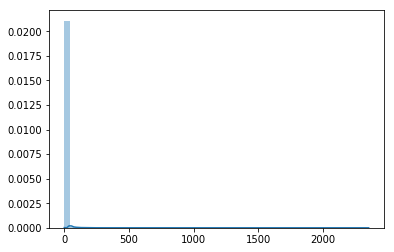

In [20]:
#sns.pairplot(ratings);
sns.distplot(user_counts[1:].values);


In [ ]:
ratings.head()

In [ ]:
sns.distplot(user_counts);

In [ ]:
sns.distplot(ratings);

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)